In [1]:
# importing basic much needed library:-
import pandas as pd
import numpy as np  
import seaborn as  sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express  as  px
import statistics as sts

# Reading dataset

In [2]:
df=pd.read_csv(r'C:\Users\lenovo\Downloads\customer_churn-Data-Set (1)\customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.shape

(7043, 21)

In [8]:
df['tenure'].unique()          

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [9]:
''' as we can see here there  is zero tenure '''

' as we can see here there  is zero tenure '

In [10]:
df[df['tenure']==0].shape[0]

11

In [11]:
df[(df['MonthlyCharges']== 0 )].shape[0]

0

In [12]:
df[(df['TotalCharges']==0 )].shape[0]

0

In [13]:
df[(df['TotalCharges']==' ' )].shape[0]

11

In [14]:
# there were 11 zero in the tenure column and there are  no zero values in the  monthly charges  as we know total  charges are monthly charges multiply 
# by tenure ( tc=t*mc) so 11 total charges value should  be zero but there are no zero value but it is spaced values there . so we will replace it by 
# some method . 

In [15]:
df[df['TotalCharges'].str.match(r'^\D')][['TotalCharges','MonthlyCharges','tenure']] # non digit  checking or we can use 
# df[df['TotalCharges']==' ' ]['TotalCharges']

,TotalCharges,MonthlyCharges,tenure
488,,52.55,0
753,,20.25,0
936,,80.85,0
1082,,25.75,0
1340,,56.05,0
3331,,19.85,0
3826,,25.35,0
4380,,20.00,0
5218,,19.70,0
6670,,73.35,0


In [16]:
# so these specific rows are having spaced value  

In [17]:
df['TotalCharges']=df['MonthlyCharges']*df['tenure']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df['TotalCharges'].replace(' ' , 0 )

0         29.85
1       1936.30
2        107.70
3       1903.50
4        141.40
         ...   
7038    2035.20
7039    7430.40
7040     325.60
7041     297.60
7042    6972.90
Name: TotalCharges, Length: 7043, dtype: float64

In [20]:
df[df['TotalCharges']== ' '].shape[0]

0

In [21]:
# now there  are no spaced values in the TotalCharges feature 

# 1. Data Manipulation

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1936.30,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,107.70,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1903.50,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,141.40,Yes


In [23]:
#● Extract the 5th column and store it in ‘customer_5’
customer_5 = df['Dependents']
customer_5

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [24]:
#● Extract the 15th column and store it in ‘customer_15’
customer_15 = df['StreamingMovies']

In [25]:
#● Extract all the male senior citizens whose payment method is electronic
#check and store the result in ‘senior_male_electronic’

In [26]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [27]:
senior_male_electronic = df[(df['gender']=='Male') & (df['SeniorCitizen']== 1) & (df['PaymentMethod' ]=='Electronic check')]
senior_male_electronic.T

,20,55,57,78,91,129,168,214,245,247,...,6717,6773,6809,6819,6836,6837,6894,6914,6967,7032
customerID,8779-QRDMV,1658-BYGOY,5067-XJQFU,0191-ZHSKZ,2424-WVHPL,2639-UGMAZ,3445-HXXGF,2504-DSHIH,0221-WMXNQ,9947-OTFQU,...,3768-NLUBH,3990-QYKBE,9274-CNFMO,3005-NFMTA,5868-YWPDW,6229-LSCKB,1400-MMYXY,7142-HVGBG,8739-WWKDU,6894-LFHLY
gender,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male,...,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
SeniorCitizen,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Partner,No,No,Yes,No,No,No,Yes,Yes,No,No,...,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No
Dependents,No,No,Yes,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
tenure,1,18,66,30,1,71,58,23,4,15,...,57,37,4,55,6,6,3,43,25,1
PhoneService,No,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,No phone service,Yes,Yes,No,No,No phone service,No phone service,Yes,No,No,...,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes
InternetService,DSL,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,...,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic
OnlineSecurity,No,No,No,Yes,No,Yes,No,No,Yes,No,...,No,No,No,Yes,No,No,No,No,No,No


In [28]:
# there are only 298 value having all these three conditions

In [29]:
#● Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in
#‘customer_total_tenure’

In [30]:
customer_total_tenure=df[(df['tenure']> 70) & ( df['MonthlyCharges']> 100 )]
customer_total_tenure.T

,17,59,94,106,193,198,202,241,369,437,...,6686,6700,6728,6768,6793,6859,6934,6992,7022,7039
customerID,9959-WOFKT,5954-BDFSG,9848-JQJTX,6728-DKUCO,9680-NIAUV,7255-SSFBC,3363-DTIVD,6614-FHDBO,3520-FJGCV,4376-KFVRS,...,4670-TABXH,8107-RZLNV,2380-DAMQP,9739-JLPQJ,1320-GVNHT,3508-CFVZL,6257-DTAYD,0218-QNVAS,7203-OYKCT,2234-XADUH
gender,Male,Female,Male,Female,Female,Male,Male,Male,Male,Male,...,Male,Male,Female,Female,Male,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Partner,No,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes
Dependents,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,...,No,No,No,Yes,Yes,No,No,Yes,No,Yes
tenure,71,72,72,72,72,72,71,72,72,72,...,72,72,72,72,72,71,71,71,72,72
PhoneService,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
MultipleLines,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
InternetService,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,...,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic
OnlineSecurity,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,...,No,No,Yes,Yes,Yes,Yes,No,No,No,No


In [31]:
#------- there are 175 customer whose monthly charges are more  than $100 and the tenure  is more than 70 months

In [32]:
# ●Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ and store the result in
#‘two_mail_yes’

In [33]:
two_mail_yes = df[(df['Contract']== 'Two year') & (df['PaymentMethod']=='Mailed check') & (df['Churn']=='Yes')]

In [34]:
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1141.65,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,808.50,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4584.00,Yes


In [35]:
# only customers are satisfying the above condition


In [36]:
#● **Extract 333 random records from the customer_churndataframe and store the result in ‘customer_333

In [37]:
customer_333 = df.sample(333, random_state=42)

In [38]:
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,1035.25,No
3825,3620-EHIMZ,Female,0,Yes,Yes,52,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1006.20,No
1807,6910-HADCM,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35,Yes
132,8587-XYZSF,Male,0,No,No,67,Yes,No,DSL,No,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3386.85,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,6890-PFRQX,Male,0,No,No,18,Yes,Yes,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,69.50,1251.00,No
3601,1552-CZCLL,Female,0,Yes,Yes,55,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.00,1100.00,No
2149,2014-MKGMH,Female,0,No,No,46,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,101.10,4650.60,No
5141,0303-WMMRN,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.25,96.25,No


In [39]:
#● Get the count of different levels from the ‘Churn’ column
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# 2. Data Visualization

In [40]:
# # ● Build a bar-plot for the ’InternetService’ column:
# a. Set x-axis label to ‘Categories of Internet Service’
# b. Set y-axis label to ‘Count of Categories’
# c. Set df['InternetService']the title of plot to be ‘Distribution of Internet Service’
# d. Set the color of the bars to be ‘orange

In [41]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

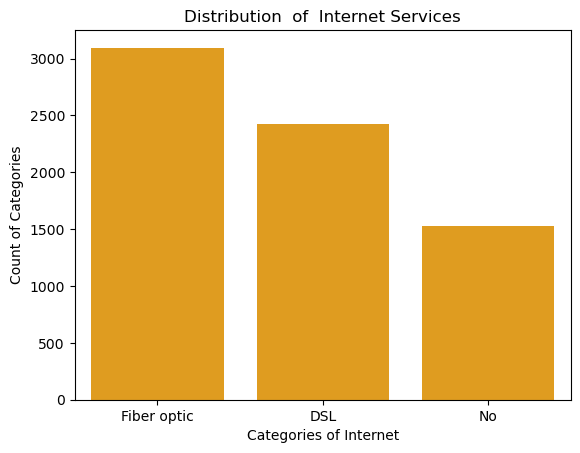

In [42]:
counts=df['InternetService'].value_counts()
    
    

sns.barplot(x=counts.index ,y=counts.values ,color= 'orange')
plt.xlabel('Categories of Internet')
plt.ylabel('Count of Categories')
plt.title('Distribution  of  Internet Services')
plt.show()

In [43]:
# ● Build a histogram for the ‘tenure’ column:
# a. Set the number of bins to be 30
# b. Set the color of the bins to be ‘green’
# c. Assign the title ‘Distribution of tenure’

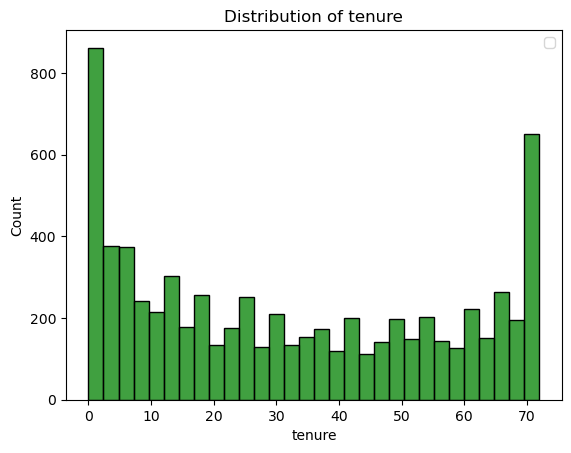

In [44]:
sns.histplot(data=df['tenure'] , color='green' , bins=30,)
plt.title('Distribution of tenure')
plt.legend()
plt.show()

In [45]:
# ● Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map
# ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
# a. Assign the points a color of ‘brown’
# b. Set the x-axis label to ‘Tenure of customer’
# c. Set the y-axis label to ‘Monthly Charges of customer’
# d. Set the title to ‘Tenure vs Monthly Charges’
# e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the
# y-axis &
# f. ‘Contract’ on the x-axis.

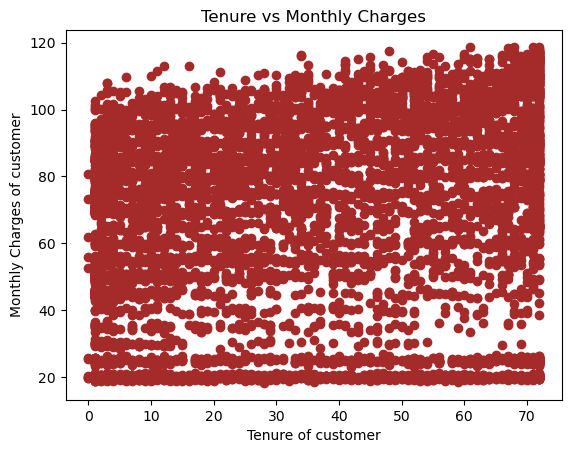

In [46]:
plt.scatter(y=df['MonthlyCharges'],x=df['tenure'] , color='brown' )
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()


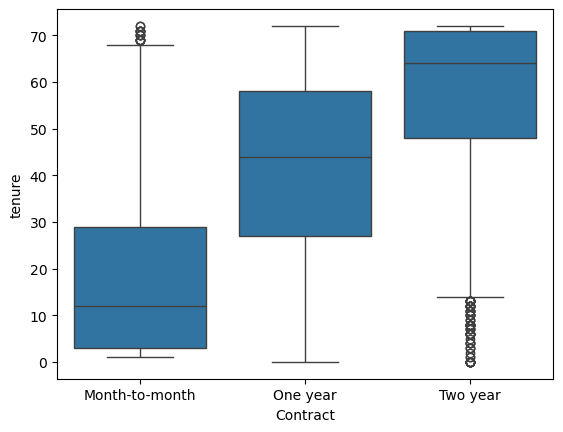

In [47]:
# boxplot between tenure and contract
sns.boxplot(x=df['Contract'] , y=df['tenure'])
plt.show()

In [48]:
#  3. Linear Regression:
# ● Build a simple linear model where dependent variable is ‘MonthlyCharges’
# and independent variable is ‘tenure’:
# a. Divide the dataset into train and test sets in 70:30 ratio.
# b. Build the model on train set and predict the values on test set
# c. After predicting the values, find the root mean square error
# d. Find out the error in prediction & store the result in ‘error’
# e. Find the root mean square error

In [49]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1936.30,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,107.70,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1903.50,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,141.40,Yes


In [50]:
df['tenure'].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

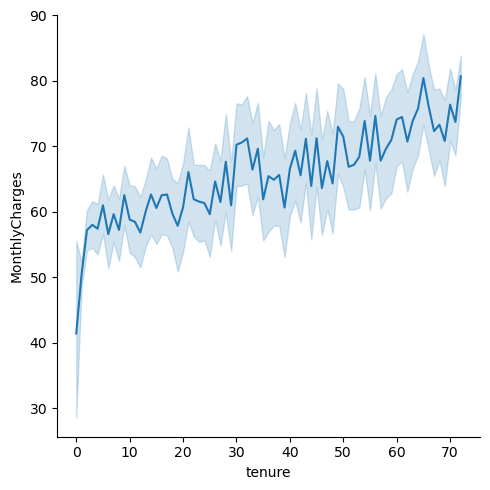

In [51]:
sns.relplot ( data=df,x='tenure', y='MonthlyCharges' ,  kind='line' )
plt.show()

In [52]:
# model building 
x=df[['tenure']]#independent variable
y=df[['MonthlyCharges']] #dependent variable

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
ss=StandardScaler()

In [55]:

from sklearn.model_selection import train_test_split

In [56]:
x_train , x_test , y_train , y_test = train_test_split( x,y, test_size=.30 , random_state=42 )

In [57]:
# model initailization

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr=LinearRegression() 

In [60]:
# train the model 

In [61]:
lr.fit(x_train , y_train)

LinearRegression()

In [62]:
lr.coef_

array([[0.30821548]])

In [63]:
lr.intercept_

array([54.79837463])

In [64]:
y_pred=lr.predict(x_test)

In [65]:
x_test

,tenure
185,1
2715,41
3825,52
1807,1
132,67
...,...
5522,1
6377,1
5500,60
2392,20


In [66]:
y_test

,MonthlyCharges
185,24.80
2715,25.25
3825,19.35
1807,76.35
132,50.55
...,...
5522,70.15
6377,44.65
5500,60.50
2392,90.70


In [67]:
from sklearn.metrics import mean_squared_error , mean_absolute_error,r2_score

In [68]:
# model evaluation
mean_absolute_error(y_test , y_pred )

25.225560821286088

In [69]:
a=mean_squared_error(y_test , y_pred)
a


845.6091871095869

In [70]:
r2_score(y_test , y_pred)

0.05856035027031614

In [71]:
#root mean squared error
np.sqrt(a)

np.float64(29.07936015646814)

In [72]:
error= y_test - y_pred
error


,MonthlyCharges
185,-30.306590
2715,-42.185209
3825,-51.475579
1807,21.243410
132,-24.898812
...,...
5522,15.043410
6377,-10.456590
5500,-12.791303
2392,29.737316


In [73]:
# 4. Logistic Regression:
# ● Build a simple logistic regression model where dependent variable is
# ‘Churn’ and independent variable is ‘MonthlyCharges’:
# a. Divide the dataset in 65:35 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and get the accuracy score
# d. Build a multiple logistic regression model where dependent variable
# is
# ‘Churn’ and independent variables are ‘tenure’ and
# ‘MonthlyCharges’
# e. Divide the dataset in 80:20 ratio
# f. Build the model on train set and predict the values on test set
# g. Build the confusion matrix and get the accuracy score

In [74]:
X=df[['MonthlyCharges']]
Y=df['Churn']

In [75]:
Y.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train , X_test , Y_train , Y_test = train_test_split( X , Y , test_size=0.35 , random_state=42)

In [78]:
X_train[:10]

,MonthlyCharges
3143,72.80
192,19.75
6251,19.25
1126,74.65
2689,116.75
2707,98.70
6890,61.10
304,81.85
2957,80.30
1292,84.50


In [79]:
Y_train[:10]

3143     No
192      No
6251     No
1126    Yes
2689     No
2707    Yes
6890     No
304      No
2957     No
1292     No
Name: Churn, dtype: object

In [80]:
X_test

,MonthlyCharges
185,24.80
2715,25.25
3825,19.35
1807,76.35
132,50.55
...,...
5940,85.85
1788,19.60
5101,106.65
6549,56.25


In [81]:
Y_test

185     Yes
2715     No
3825     No
1807    Yes
132      No
       ... 
5940     No
1788     No
5101     No
6549    Yes
528      No
Name: Churn, Length: 2466, dtype: object

In [82]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# for col in df.columns:
#     if df[col].dtype =='object':
#         df[col]= le.fit_transform(df[col])
# this is the code for performing labelEncoder but as of now  we do not have multiple feature so it is not needed .

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
LR=LogisticRegression()

In [85]:
LR.fit(X_train , Y_train )

LogisticRegression()

In [86]:
Y_pred = LR.predict(X_test)

In [87]:
from sklearn.metrics import *

In [88]:
cf=confusion_matrix(Y_test , Y_pred )
cf

array([[1797,    0],
       [ 669,    0]])

In [89]:
accuracy_score(Y_test,Y_pred)*100

72.87104622871047

# Building another model where two independent variables are present 

In [90]:
x=df[['tenure', 'MonthlyCharges']]
y=df['Churn']

In [91]:
x.head()

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70


In [92]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size=.20 , random_state=42 )

In [95]:
x_train[:10]

,tenure,MonthlyCharges
2142,21,64.85
1623,54,97.20
6074,1,23.45
1362,4,70.20
6754,0,61.90
1212,7,69.55
2722,32,18.95
4006,72,19.80
6791,19,39.65
5466,10,19.95


In [96]:
y_train[:10]

2142     No
1623     No
6074    Yes
1362    Yes
6754     No
1212     No
2722     No
4006     No
6791    Yes
5466     No
Name: Churn, dtype: object

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
model=LogisticRegression()

In [99]:
model.fit(x_train , y_train)

LogisticRegression()

In [100]:
y_pred = model.predict(x_test )

In [101]:
from sklearn.metrics import*

In [102]:
confusion_matrix(y_test, y_pred )

array([[944,  92],
       [193, 180]])

In [103]:
accuracy_score(y_test , y_pred )*100

79.77288857345636

In [104]:
# 5. Decision Tree:
# ● Build a decision tree model where dependent variable is ‘Churn’ and
# independent variable is ‘tenure’:
# a. Divide the dataset in 80:20 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and calculate the accuracy

In [105]:
x=df[['tenure']]
y=df['Churn']

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size = .20 , random_state = 42 )

In [108]:
x_train.head()

,tenure
2142,21
1623,54
6074,1
1362,4
6754,0


In [109]:
x_test.head()

,tenure
185,1
2715,41
3825,52
1807,1
132,67


In [110]:
y_train.head()

2142     No
1623     No
6074    Yes
1362    Yes
6754     No
Name: Churn, dtype: object

In [111]:
from sklearn.tree import  DecisionTreeClassifier

In [112]:
dt= DecisionTreeClassifier()

In [113]:
dt.fit(x_train ,  y_train )

DecisionTreeClassifier()

In [114]:
y_pred=dt.predict(x_test)

In [115]:
from sklearn.metrics import *

In [116]:
confusion_matrix(y_test , y_pred )

array([[951,  85],
       [257, 116]])

In [117]:
print(classification_report(y_test , y_pred ))

              precision    recall  f1-score   support

          No       0.79      0.92      0.85      1036
         Yes       0.58      0.31      0.40       373

    accuracy                           0.76      1409
   macro avg       0.68      0.61      0.63      1409
weighted avg       0.73      0.76      0.73      1409



In [118]:
# 6. Random Forest:
# ● Build a Random Forest model where dependent variable is ‘Churn’ and
# independent variables are ‘tenure’ and ‘MonthlyCharges’:
# a. Divide the dataset in 70:30 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and calculate the accuracy

In [119]:
x=df[['tenure','MonthlyCharges']]
y=df['Churn']

In [120]:
x.head()

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70


In [121]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
x_train , x_test , y_train , y_test = train_test_split ( x , y , test_size = .30 , random_state = 42 )

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rf = RandomForestClassifier(n_estimators=5 , criterion='entropy')

In [126]:
rf.fit(x_train, y_train )

RandomForestClassifier(criterion='entropy', n_estimators=5)

In [133]:
confusion_matrix(y_test , y_pred  )

array([[1308,  231],
       [ 299,  275]])

In [134]:
y_pred=rf.predict(x_test)

In [135]:
from sklearn.metrics import *
accuracy_score(y_test ,y_pred )

0.7491717936583058

# Summary

 '''This is the customer churn dataset having some null value and no duplicate values so I have  performed EDA so that I can remove null values
 actually those were not null values these were blank values so replaced it will zero.Then, as per the questions performed some data manipulation 
 and data visualization.Afterthat created linearregression , logisticregrerssion , decisiontree and  randomforest as per the question given in the  
 assignment there were only one feature in the independent variable so that it has not  perfomed well according to expectations.As only one feature 
 is  given as  independent feature so can we  can not do feature engineering , vif , label encoding and other important techniques because it was
 needed.Ultimately performed all the task given in the assignment as per my knowledge.'''